# Image Classification using CNNs
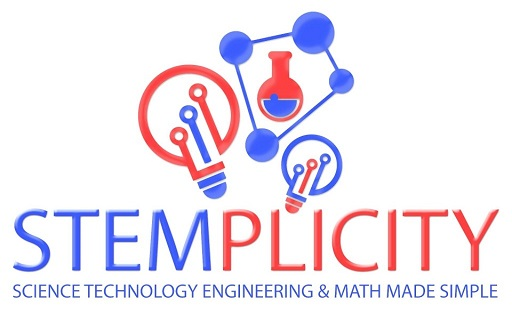

You need to classify images based on previous knowledge adquired from the CIFAR-10 dataset.

In this challenge we have a CIFAR-10 dataset consisting in 60000 low resolution images divided into the following 10 classes: 

- Airplanes
- Cars 
- Birds
- Cats
- Deer
- Dogs
- Frogs
- Horses
- Ships
- Trucks

#### **Main Objective**: The main objective is to build a image classifier


## Table of Contents

1. [Import Libraries](#1)
2. [Import Data](#2)
    - 2.1. [Data Visualization](#2.1)
3. [Data Preparation](#3)
    - 3.1. [One Hot Encoding Target Variable](#3.1)
    - 3.2. [Data Normalization](#3.2)
4. [Image Augmentation](#4)
5. [Model Training](#5)
6. [Model Evaluation](#6)
    - 6.1. [Analyzing Loss/Accuracy Functions](#6.1)
    - 6.2. [Evaluate Model Performance on Test Set](#6.2)
    - 6.3. [Confusion Matrix](#6.3)
7. [Save Model](#7)
8. [Predict from local image](#8)

# STEP #1: IMPORT LIBRARIES

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow import keras

from keras import layers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

import seaborn as sns
from sklearn.metrics import confusion_matrix

# STEP #2: IMPORT DATA

In [2]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

## STEP #2.1: DATA VISUALIZATION

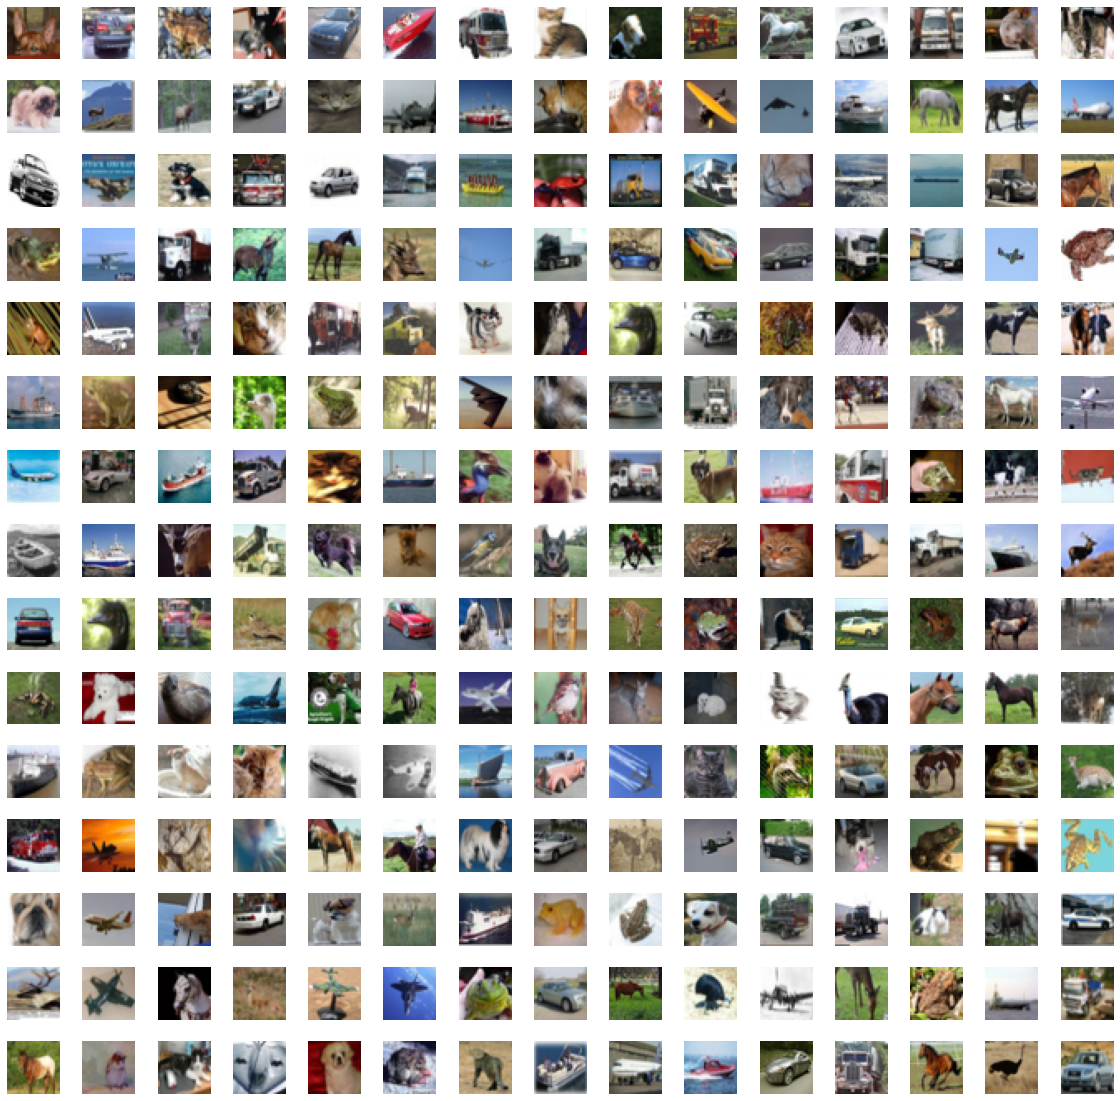

In [3]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20, 20))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# STEP #3: DATA PREPARATION

## STEP #3.1: DATA NORMALIZATION

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
mean=np.mean(X_train)
std=np.std(X_train)
X_test=(X_test-mean)/std
X_train=(X_train-mean)/std

## STEP #3.2: ONE HOT ENCODING THE TARGET VARIABLE

In [5]:
number_categories = 10
y_train = keras.utils.to_categorical(y_train, number_categories)
y_test = keras.utils.to_categorical(y_test, number_categories)

# STEP #4: IMAGE AUGMENTATION

In [6]:
#to get the correct input shape to feed the model
Input_shape = X_train.shape[1:]

In [7]:
with tf.device('/cpu:0'):
   data_augmentation = tf.keras.Sequential([
     tf.keras.layers.RandomFlip('horizontal',input_shape=Input_shape),
     tf.keras.layers.RandomRotation(0.05),
     ])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



# STEP #5: MODEL TRAINING

In [8]:
model = Sequential([
    data_augmentation,
    Conv2D(32, kernel_size = (3,3), activation = 'relu', padding='same'),
    BatchNormalization(axis=-1),
    Conv2D(32, kernel_size = (3,3), activation = 'relu',padding='same'),
    MaxPooling2D(2,2),
    
    Conv2D(64, kernel_size = (3,3), activation = 'relu',padding='same'),
    BatchNormalization(axis=-1),
    Conv2D(64, kernel_size = (3,3), activation = 'relu',padding='same'),
    BatchNormalization(axis=-1),
    MaxPooling2D(2,2),

    Conv2D(128, kernel_size = (3,3), activation = 'relu',padding='same'),
    BatchNormalization(axis=-1),
    Conv2D(128, kernel_size = (3,3), activation = 'relu',padding='same'),
    BatchNormalization(axis=-1),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(512, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation = 'softmax'),
])

In [9]:
opt = keras.optimizers.Adam(learning_rate=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, batch_size = 128, epochs = 50, shuffle = True,callbacks=[callback], validation_split=0.1)

Epoch 1/50
352/352 [==============================] - 188s 530ms/step - loss: 1.5951 - accuracy: 0.4750 - val_loss: 1.4320 - val_accuracy: 0.5074
Epoch 2/50
352/352 [==============================] - 186s 530ms/step - loss: 1.0709 - accuracy: 0.6273 - val_loss: 0.9638 - val_accuracy: 0.6768
Epoch 3/50
352/352 [==============================] - 186s 527ms/step - loss: 0.8795 - accuracy: 0.6938 - val_loss: 1.0243 - val_accuracy: 0.6570
Epoch 4/50
352/352 [==============================] - 706s 2s/step - loss: 0.7670 - accuracy: 0.7341 - val_loss: 0.8386 - val_accuracy: 0.7288
Epoch 5/50
352/352 [==============================] - 186s 528ms/step - loss: 0.6866 - accuracy: 0.7612 - val_loss: 0.7492 - val_accuracy: 0.7548
Epoch 6/50
352/352 [==============================] - 186s 529ms/step - loss: 0.6301 - accuracy: 0.7826 - val_loss: 0.6633 - val_accuracy: 0.7746
Epoch 7/50
352/352 [==============================] - 187s 531ms/step - loss: 0.5857 - accuracy: 0.7958 - val_loss: 0.5796 - va

# STEP #6: MODEL EVALUATION
## STEP #6.1: ANALYZING LOSS/ACCURACY FUNCTIONS

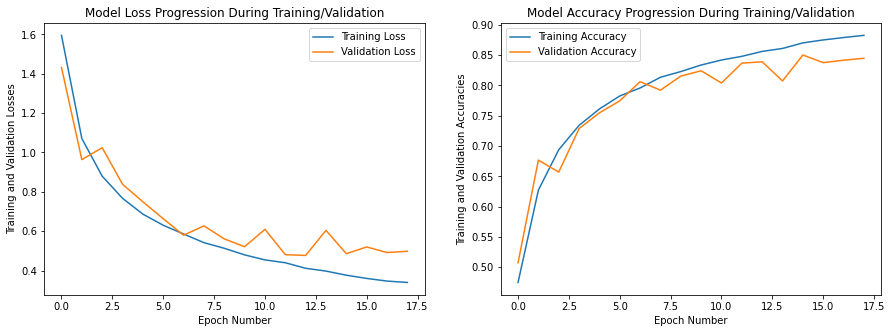

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])

ax1.set_title('Model Loss Progression During Training/Validation')
ax1.set(xlabel='Epoch Number', ylabel='Training and Validation Losses')
ax1.legend(['Training Loss', 'Validation Loss'])

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax2.set_title('Model Accuracy Progression During Training/Validation')
ax2.set(xlabel='Epoch Number', ylabel='Training and Validation Accuracies')
ax2.legend(['Training Accuracy', 'Validation Accuracy'])

## STEP #6.2: EVALUATE MODEL PERFORMANCE ON TEST SET

In [12]:
evaluation = model.evaluate(X_test, y_test,batch_size=128)
print('Test Accuracy: {}'.format(evaluation[1]))

79/79 [==============================] - 1s 13ms/step - loss: 0.5266 - accuracy: 0.8345
Test Accuracy: 0.8345000147819519


In [13]:
test_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


## STEP #6.3: CONFUSION MATRIX

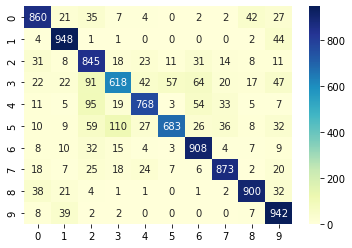

In [14]:
ax = sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1),np.argmax(test_pred, axis=1)), cmap="YlGnBu",annot=True,fmt="d")

# STEP #7: SAVE MODEL

In [15]:
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_model.h5')
model.save(model_path)

# STEP #8: PREDICT FROM LOCAL IMAGE

In [16]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('test.jpg')
	# load model
	model = load_model('./saved_models/cifar10_model.h5')
	# predict the class
	result = model.predict(img)
	result = result.argmax(axis=-1)
	print('Predicted Class:',result)
 
# entry point, run the example
run_example()

1/1 [==============================] - 0s 149ms/step
Predicted Class: [3]
